Found 50 images belonging to 4 classes.
Found 10 images belonging to 4 classes.
Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.3694 - loss: 3.0791 - val_accuracy: 0.2000 - val_loss: 1.0317
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.5548 - loss: 1.0482 - val_accuracy: 0.8000 - val_loss: 0.9092
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.6177 - loss: 0.8780 - val_accuracy: 0.7000 - val_loss: 0.5832
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.7037 - loss: 0.5619 - val_accuracy: 0.7000 - val_loss: 0.5760
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.8409 - loss: 0.5395 - val_accuracy: 0.9000 - val_loss: 0.4897
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.8702 - loss: 0.4891 - val_accuracy: 0.7000 - val_loss: 0.4758
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.8940 - loss: 0.3521 - val_accuracy: 0.9000 - val_loss: 0.4223
Epoch 8/10
13/13 ━━━━━━━━━━━━━━

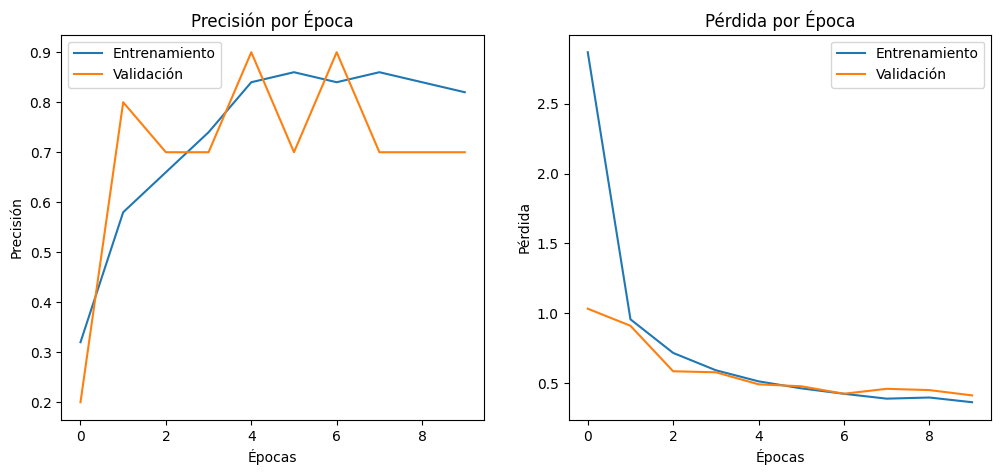

In [8]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pytesseract
import matplotlib.pyplot as plt
import re
import shutil  # Para mover archivos

# Configuración de Tesseract OCR
pytesseract.pytesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # Cambia esta ruta si Tesseract está en otra ubicación

def build_simple_model(num_classes=4):
    model = Sequential([
        Input(shape=(128, 128, 1)),
        Conv2D(16, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_simple_model()


# Configurar generador de datos para cargar las imágenes de las carpetas "reales" y "falsas"
def load_data(train_dir, target_size=(128, 128), batch_size=4):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Normalización y 20% de validación
    train_data = datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',  # Cambia a 'categorical' para clasificación multi-clase
    subset='training'
    )
    val_data = datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        color_mode='grayscale',
        batch_size=batch_size,
        class_mode='categorical',  # Cambia a 'categorical' para clasificación multi-clase
        subset='validation'
    )
    return train_data, val_data

# Entrenar el modelo con los datos de las carpetas "reales" y "falsas"
def train_model(train_data, val_data, epochs=10):
    history = model.fit(train_data, validation_data=val_data, epochs=epochs)
    return history

# Función para graficar el historial de entrenamiento
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Gráfica de Precisión
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.title('Precisión por Época')
    plt.legend()

    # Gráfica de Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Entrenamiento')
    plt.plot(history.history['val_loss'], label='Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.title('Pérdida por Época')
    plt.legend()

    plt.show()

# Ruta de las carpetas de entrenamiento (donde están las carpetas "reales" y "falsas")
train_dir = "./"  # Cambia esta ruta si las carpetas están en otra ubicación

# Validación de la estructura de datos y entrenamiento del modelo
train_data, val_data = load_data(train_dir)
history = train_model(train_data, val_data, epochs=10)

# Graficar el rendimiento del entrenamiento
plot_training_history(history) 
